In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
corredores = pd.read_csv('corredores.csv')
corridas = pd.read_csv('corridas.csv')


In [4]:
corredores.head()

,corredores.id-corredor,corredores.ageGroup,corredores.fullname,corredores.uri,corredores.nationality,corredores.sex,corredores.Club,corredores.Team,corredores.Sponsor(s),corredores.Description,corredores.Geral,corredores.20K,corredores.50K,corredores.100K,corredores.100m
0,5444,65-69,Michael John DE FREITAS,5444.michaeljohn.defreitas,BR,H,NaN,NaN,NaN,NaN,341.0,NaN,341.0,NaN,NaN
1,12619,40-44,Fernanda MACIEL,12619.fernanda.maciel,BR,F,NaN,NaN,The North Face,NaN,585.0,NaN,586.0,NaN,NaN
2,20086,55-59,Andre ARRUDA,20086.andre.arruda,BR,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20087,50-54,Ribeiro SANTOS-DECIO,20087.ribeiro.santosdecio,BR,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20839,50-54,Adriano BURAGAS,20839.adriano.buragas,BR,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
corredores_idade = corredores['corredores.ageGroup']
tabela_idade = corredores_idade.value_counts()
tabela_idade['0-20'] = tabela_idade['U18'] + tabela_idade['U20']
tabela_idade = tabela_idade.drop(['U18', 'U20'])
tabela_idade = tabela_idade.sort_index()

In [6]:
azul_claro = '#73BFA7'
azul_escuro = '#3494BA'

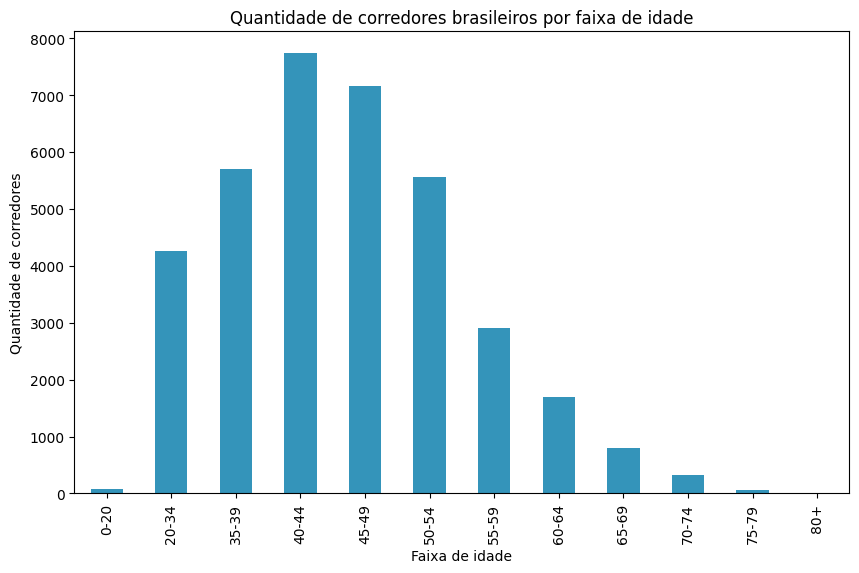

In [7]:
tabela_idade.plot(kind='bar', color=azul_escuro, xlabel='Faixa de idade', ylabel='Quantidade de corredores', title='Quantidade de corredores brasileiros por faixa de idade', figsize=(10, 6))
plt.show()

In [8]:
corridas_nao_br = pd.read_csv('corridas_nao_brasileiras.csv')
corridas_nao_br.head()

,id-corrida,City / Country,qtd_Br
0,179,France,1
1,217,France,2
2,220,France,5
3,264,Italy,1
4,274,France,2


In [142]:
places = {
    "France": ["Besançon", "Centuri", "Chamonix", "Orsières", "Martigny-Combe", "Courchevel le praz", "L'Abbaye", "Old Deer Park - Richmond", "Beret", "San Martin de Castañeda", "Les Houches", "Escuredo", "Colmars-les-Alpes", "Les Diablerets", "Montreux", "Bex", "Omegna", "Fontainebleau", "Chamonix-Mont-Blanc", "Courmayeur", "Valdo di Fomazza", "Radda in Chianti", "Ajaccio", "Monte", "Montaria (viana do Castelo)", "Val Cenis", "Satão", "Fontenais"],
    "Italy": ["Gavirate", "Saluzzo", "Arco", "Grindelwald", "Cilaos", "Les", "Beret", "Les Diablerets", "Montreux", "Bex", "Liddes", "Colmars-les-Alpes", "Le Markstein", "Bormio", "Besançon", "Fontainebleau", "Valdo di Fomazza", "Ajaccio", "Monte", "Montaria (viana do Castelo)", "Val Cenis", "Satão", "Fontenais"],
    "United States": ["Page, Arizona", "High1 resort", "Blairsville", "Hatch, Utah", "Apple Valley, Utah", "Dalton, Georga", "Blue Ridge, Ga", "Spring Valley, AZ", "Natural Chimneys Park", "Oxford", "Crystal Cascades, Redlynch", "Page, Arizona"],
    "Portugal": ["Cape Verde", "Abrantes", "Melgaço", "Terrasse de l'Observatoire de Meudon (92)", "Valongo", "Coimbra/Lousã", "Comuna Torres del Paine", "Piau-Engaly", "Covilha", "Coimbra", "Friol"],
    "Switzerland": ["Zermatt", "Laax", "Engelberg", "Arosa", "Leukerbad", "Kühtai", "Samedan", "Scuol", "Crans-Montana", "Rougemont", "Nendaz", "Bormio", "St. Moritz", "Mürren"],
    "Chile": ["Puerto Varas", "Santiago", "Pucon"],
    "United Kingdom": ["Old Deer Park - Richmond", "Corfe Castle", "London", "Hebden Bridge", "Wembury", "Stoneham", "Dundas", "Oxford", "Arrowtown", "Llanberis", "Haslemere", "Barnstaple"],
    "Argentina": ["San Martin de Castañeda", "Villa La Angostura", "San Carlos de Bariloche", "Buenos Aires", "Santiago", "San Martín De Los Andes"],
    "Egypt": ["Cairo"],
    "Morocco": ["Fes"],
    "Germany": ["Saarbrücken"],
    "Spain": ["Puerto Varas", "San Pedro de Atacama", "Puerto Vallarta", "San Bartolomé de Tirajana", "San Pedro de Atacama", "Puerto Vallarta", "Puerto Vallarta", "Puerto Vallarta", "Barcelona", "Mallorca", "Santiago", "Valencia", "Barcelona", "Valencia", "Madrid", "Vigo", "Catalonia", "Andalucia", "Tenerife", "Canary Islands", "Catalonia", "Madrid", "Canary Islands", "Madrid", "Tenerife"],
    "Japan": ["Hakuba", "Tokyo", "Hakuba", "Hakuba", "Hakuba", "Tokyo", "Hakuba", "Hakuba", "Hakuba"],
    "Jordan": ["Wadi Rum City"],
    "Denmark": ["Copenhagen"],
    "Luxembourg": ["Luxembourg City"],
    "Israel": ["Jerusalem", "Tel Aviv"],
    "Sweden": ["Stockholm"],
    "New Zealand": ["Queenstown", "Rotorua", "Auckland", "Wellington", "Christchurch", "Dunedin"],
    "Ecuador": ["Quito"],
    "Mexico": ["Mexico City", "Puerto Vallarta"],
    "Peru": ["Lima"],
    "Canada": ["Toronto", "Vancouver", "Montreal", "Calgary", "Ottawa", "Edmonton", "Quebec City", "Winnipeg"],
    "Australia": ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Gold Coast", "Canberra", "Newcastle", "Geelong", "Hobart", "Townsville", "Cairns", "Darwin", "Toowoomba"],
    "Greece": ["Athens", "Santorini", "Mykonos", "Rhodes", "Crete", "Corfu", "Chania"],
    "Belgium": ["Brussels", "Bruges", "Antwerp", "Ghent", "Liege"],
    "Indonesia": ["Bali", "Jakarta", "Yogyakarta", "Bandung", "Surabaya", "Lombok", "Makassar", "Semarang", "Palembang", "Malang"],
    "Slovenia": ["Ljubljana", "Bled", "Maribor", "Piran", "Kranjska Gora", "Ptuj", "Portorož", "Bohinj"],
    "South Africa": ["Cape Town", "Johannesburg", "Durban", "Pretoria", "Port Elizabeth", "Bloemfontein", "East London", "Kimberley", "Rustenburg", "Nelspruit"],
    "Namibia": ["Windhoek"],
    "Venezuela": ["Caracas"],
    "Croatia": ["Zagreb", "Dubrovnik", "Split", "Zadar", "Pula", "Rijeka", "Sibenik", "Varazdin", "Osijek"],
    "China": ["Beijing", "Shanghai", "Xi'an", "Guangzhou", "Chengdu", "Shenzhen", "Nanjing", "Wuhan", "Hangzhou", "Chongqing", "Suzhou", "Shenyang", "Harbin", "Jinan", "Dalian", "Zhengzhou", "Changsha", "Kunming", "Nanning", "Hefei", "Urumqi", "Fuzhou", "Taiyuan", "Nanchang", "Guiyang", "Xiamen", "Hohhot", "Lanzhou", "Haikou", "Hohhot", "Xining", "Lhasa"],
    "Cambodia": ["Phnom Penh", "Siem Reap", "Sihanoukville", "Battambang", "Kampot", "Kep", "Koh Rong", "Koh Kong", "Koh Ker", "Koh Ta Kiev", "Koh Thmei"],
    "United Arab Emirates": ["Dubai", "Abu Dhabi", "Sharjah", "Ajman", "Fujairah", "Ras Al Khaimah", "Umm Al Quwain"],
    "Mongolia": ["Ulaanbaatar", "Darkhan", "Erdenet", "Khovd", "Olgii", "Choibalsan", "Bayankhongor", "Arvaikheer", "Bulgan", "Baruun-Urt"],
    "Turkey": ["Istanbul", "Ankara", "Izmir", "Bursa", "Antalya", "Adana", "Konya", "Gaziantep", "Diyarbakir", "Mersin", "Eskisehir", "Kayseri", "Samsun", "Denizli", "Sanliurfa", "Kahramanmaras", "Malatya", "Erzurum", "Van", "Batman", "Balikesir", "Elazig", "Manisa", "Sivas", "Adapazari", "Kirikkale", "Osmaniye", "Corum", "Kutahya", "Sirnak", "Ceyhan", "Agri"],
    "Costa Rica": ["San José", "Limon", "San Francisco", "Heredia", "Alajuela", "Cartago", "Puntarenas", "Guanacaste", "Sarapiqui"],
    "Paraguay": ["Asuncion", "Ciudad del Este", "San Lorenzo", "Capiata", "Lambaré", "Fernando de la Mora", "Limpio", "Encarnacion", "Ñemby", "Mariano Roque Alonso"],
    "South Korea": ["Seoul", "Busan", "Incheon", "Daegu", "Daejeon", "Gwangju", "Suwon", "Ulsan", "Changwon", "Seongnam", "Goyang", "Yongin", "Seongnam", "Bucheon", "Cheongju", "Ansan", "Jeonju", "Cheonan", "Anyang", "Uijeongbu", "Gimhae", "Pohang", "Uiwang", "Siheung", "Gumi", "Gwangmyeong", "Gwacheon", "Andong", "Hwaseong", "Iksan", "Yeosu", "Suncheon", "Seosan"],
    "Colombia": ["Bogotá", "Medellín", "Cali", "Barranquilla", "Cartagena", "Cúcuta", "Soledad", "Ibague", "Bucaramanga", "Soacha", "Santa Marta", "Villavicencio", "Bello", "Valledupar", "Pereira", "Montería", "Neiva", "Pasto", "Armenia", "Manizales", "Itagüí", "Sincelejo", "Popayán", "Barrancabermeja", "Dos Quebradas", "Tuluá", "Envigado", "Cartago", "Maicao"],
    "Malaysia": ["Kuala Lumpur", "George Town", "Ipoh", "Kuching", "Johor Bahru", "Kota Kinabalu", "Shah Alam", "Malacca City", "Alor Setar", "Mirí", "Petaling Jaya", "Kuala Terengganu", "Sandakan", "Seremban", "Kuantan", "Taiping", "Langkawi", "Kangar", "George Town", "Muar"],
    "Hungary": ["Budapest", "Debrecen", "Szeged", "Miskolc", "Pécs", "Győr", "Nyíregyháza", "Kecskemét", "Székesfehérvár", "Szombathely", "Szolnok", "Tatabánya", "Kaposvár", "Érd", "Veszprém", "Békéscsaba", "Zalaegerszeg", "Sopron", "Eger", "Nagykanizsa", "Dunaújváros", "Hódmezővásárhely", "Salgótarján", "Cegléd", "Baja", "Orosháza", "Dunakeszi", "Szigetszentmiklós", "Esztergom", "Százhalombatta", "Mosonmagyaróvár", "Gödöllő", "Ajka", "Vác", "Kiskunfélegyháza", "Siófok", "Hajdúböszörmény", "Kiskunhalas", "Hatvan", "Békés", "Szentes", "Esztergom", "Celldömölk", "Várpalota", "Gyöngyös", "Tata", "Pápa", "Fót", "Szarvas", "Gyula", "Sárbogárd", "Keszthely", "Balassagyarmat", "Budaörs", "Tapolca", "Balmazújváros", "Mezőkövesd", "Mohács", "Sümeg", "Kerepestarcsa", "Jászberény", "Kiskőrös", "Berettyóújfalu", "Paks", "Szentendre", "Tiszavasvári", "Komló", "Szentgotthárd", "Monor", "Dombóvár", "Oroszlány", "Vecsés", "Budaörs", "Orosháza", "Békéscsaba", "Pécs", "Békéscsaba", "Pécs", "Eger", "Nagykanizsa", "Dunaújváros", "Hódmezővásárhely", "Salgótarján", "Cegléd", "Baja", "Orosháza", "Dunakeszi", "Szigetszentmiklós", "Esztergom", "Százhalombatta", "Mosonmagyaróvár", "Gödöllő", "Ajka", "Vác", "Kiskunfélegyháza", "Siófok", "Hajdúböszörmény", "Kiskunhalas", "Hatvan", "Békés", "Szentes", "Celldömölk", "Várpalota", "Gyöngyös", "Tata", "Pápa", "Fót", "Szarvas", "Gyula", "Sárbogárd", "Keszthely", "Balassagyarmat", "Budaörs", "Tapolca", "Balmazújváros", "Mezőkövesd", "Mohács", "Sümeg", "Kerepestarcsa", "Jászberény", "Kiskőrös", "Berettyóújfalu", "Paks", "Szentendre", "Tiszavasvári", "Komló", "Szentgotthárd", "Monor", "Dombóvár", "Oroszlány", "Vecsés", "Karcag", "Göd", "Csongrád", "Bátaszék", "Gyömrő", "Kalocsa", "Nagyatád", "Szécsény", "Pomáz", "Hajdúszoboszló", "Budaörs", "Tapolca", "Balmazújváros", "Mezőkövesd", "Mohács", "Sümeg", "Kerepestarcsa", "Jászberény", "Kiskőrös", "Berettyóújfalu", "Paks", "Szentendre", "Tiszavasvári", "Komló", "Szentgotthárd", "Monor", "Dombóvár", "Oroszlány", "Vecsés", "Karcag", "Göd", "Csongrád", "Bátaszék", "Gyömrő", "Kalocsa", "Nagyatád", "Szécsény", "Pomáz", "Hajdúszoboszló"],
    "Bulgaria": ["Sofia", "Plovdiv", "Varna", "Burgas", "Ruse", "Stara Zagora", "Pleven", "Sliven", "Dobrich", "Shumen", "Pernik", "Yambol", "Haskovo", "Blagoevgrad", "Veliko Tarnovo", "Gabrovo", "Vratsa", "Asenovgrad", "Kazanlak", "Kyustendil", "Pazardzhik", "Gorna Oryahovitsa", "Petrich", "Montana", "Lovech", "Silistra", "Targovishte", "Novi Iskar", "Svilengrad", "Samokov", "Dupnitsa", "Popovo", "Rakovski", "Velingrad", "Karnobat", "Botevgrad", "Gotse Delchev", "Berkovitsa", "Nova Zagora", "Cherven Bryag", "Parvomay", "Radomir", "Peshtera", "Harmanli", "Pomorie", "Bansko", "Knezha", "Razgrad", "Svoge", "Sredets", "Aytos", "Teteven", "Sozopol", "Pirdop", "Chirpan", "Panagyurishte", "Nesebar", "Sevlievo", "Kostenets", "Etropole", "Kotel", "Tutrakan", "Lukovit", "Byala Slatina", "Rakovski", "Levski", "Tryavna", "Krichim", "Dryanovo", "Balchik", "Omurtag", "Vetovo", "Belene", "Dolni Chiflik", "Rakitovo", "Kavarna", "Tervel", "Kostenets", "Isperih", "Strazhitsa", "Tsarevo", "Simitli", "Dalgopol", "Kula", "Mezdra", "Elin Pelin", "Bregovo", "Krumovgrad", "Elhovo", "Valchedram", "Simeonovgrad", "Sapareva Banya", "Belogradchik", "Momchilgrad", "Letnitsa", "Ivaylovgrad", "Koprivshtitsa", "Svoge", "Dolna Oryahovitsa", "Pavel Banya", "Sarnitsa", "Strumyani", "Koynare", "Dolni Dabnik", "Godech", "Valchi Dol", "Kotel", "Septemvri", "Chelopech", "Belitsa", "Klisura", "Tsar Kaloyan", "Nedelino", "Beloslav", "Glodzhevo", "Krivodol", "Vurshets", "Zlatitsa", "Kuklen", "Gulyantsi", "Dolna Mitropolia", "Dolna Banya", "Valchi Dol", "Tsarevo", "Godech", "Kotel", "Septemvri", "Chelopech", "Belitsa", "Klisura", "Tsar Kaloyan", "Nedelino", "Beloslav", "Glodzhevo", "Krivodol", "Vurshets", "Zlatitsa", "Kuklen", "Gulyantsi", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat", "Suvorovo", "Batak", "Klisura", "Valchi Dol", "Dolna Mitropolia", "Dolna Banya", "Balgarovo", "Pomorie", "Bobov Dol", "Razlog", "Pordim", "Chavdar", "Zlatograd", "Krichim", "Varshets", "Dospat"]}

cities = {
    "China": ["Hong Kong"],
    "Argentina": ["San Martin De Los Andes", "Santa Cita - Tomar", "Villa la Angostura", "SAN CARLOS DE BARILOCHE", "San Martin de Casta�eda"],
    "Portugal": ["Sever do Vouga", "Penacova", "Estoi", "Arouca", "Coimbra/Lous�", "Condeixa-A-Nova", "Dem (Caminha)", "Entre-ambos-os-Rios, Ponte da Barca", "Ferreira do Z�zere", "Melga�o", "Miranda do Corvo", "Portalegre", "Santa Marta de Penagui�o", "Seia", "Sintra", "Monterreal Coahuila"],
    "Italy": ["Corte", "Cortina d'Ampezzo", "Ordino", "Orsi�res", "Val di Zoldo", "Pit�es das J�nias"],
    "France": ["LYON", "Corte", "La Roche-en-Ardenne", "MORZINE", "La Thuile", "Sagres", "Samo�ns", "St-Ferr�ol-les-Neiges", "Claret", "S�tila", "Tignes", "Talloires", "Roubion", "Rouffach", "Font-Romeu-Odeillo-Via"],
    "Spain": ["Vielha", "Valencia", "Pu Luong, Thanh Hoa", "Los Penitentes, Mendoza", "Pucon", "Villa Yacanto de Calamuchita", "Pucon", "Villa Yacanto de Calamuchita", "Villa Yacanto de Calamuchita", "Pucon", "Villa Yacanto de Calamuchita", "Pucon", "Villa Yacanto de Calamuchita", "Pucon", "Villa Yacanto de Calamuchita", "Villa Yacanto de Calamuchita", "Santa Marta de Penagui�o", "Huacawasi", "Huar�n", "Gondomar", "Itatiaia/ Rio de Janeiro", "Amares", "Barr", "Borriol", "Llaganuco", "Santiago do Cac�m", "S�o Paulo", "Seogwipo", "Sot de Chera"],
    "Australia": ["Auburn", "KCC Oval, Katoomba", "The Gap", "The Village of Big Bear Lake", "KCC Oval Katoomba", "Katoomba", "Explorers Tree, Katoomba", "Scenic World, Katoomba", "Spring Valley"],
    "Switzerland": ["Val d'Is�re", "Champ�ry", "Verbier", "Lausanne", "Aarau", "Ri�inahue"],
    "Taiwan": ["Chinese Taipei"],
    "Romania": ["Romania"],
    "Mexico": ["Ciudad de M�xico", "San Javier , Traslasierra"],
    "Belgium": ["Aalst", "Oudergem", "Uccle"],
    "Canada": ["Quebec", "Ordino"],
    "United States": ["Los Angeles", "Bellingham", "Dalton", "Glencullen", "Glencullen"],
    "Sweden": ["G�teborg", "Simrishamn"],
    "New Zealand": ["The Gap", "Blue Lake"],
    "Germany": ["Houffalize", "Saarbr�cken"],
    "Morocco": ["Ouarzazate"],
    "Vietnam": ["Pu Luong, Thanh Hoa", "Moc Chau, Son La"],
    "South Africa": ["Franschhoek", "Kabouga Gate, Addo Elephant National Park", "Tyneham"],
    "Chile": ["pucon", "Valpara�so", "Pichilemu", "Pichilemu"],
    "United Kingdom": ["Bobbin Head", "Delfim Moreira", "Farnham", "Norton, Virginia", "Oxford"],
    "Brazil": ["Huacawasi", "Huar�n", "Gondomar", "Itatiaia/ Rio de Janeiro", "Amares", "Barr", "Borriol", "Llaganuco", "Santiago do Cac�m", "S�o Paulo"],
    "Philippines": ["Manila"],
    "Japan": ["Matsuzaki", "Lake Tikitapu (Blue Lake) Reserve", "Kawerau", "Munster"],
    "Peru": ["Santiago da Guarda", "Santiago do Cac�m"],
    "Ireland": ["Dalton", "Glencullen", "Glencullen", "Dalton"],
    "Austria": ["Salzburg", "Innsbruck"],
    "Norway": ["Oslo", "Lom"],
    "Poland": ["GDANSK", "Krakow", "Zakopane"],
    "Indonesia": ["Kintamani, Bangli, Bali"],
    "Bolivia": ["pucon", "Valpara�so", "Pichilemu", "Pichilemu"],
    "Swaziland": ["Snowbird Center Plaza Area"],
    "Denmark": ["Copenhagen", "Copenhagen"],
    "Czech Republic": ["Houffalize", "Saarbr�cken"],
    "Greece": ["Fiames/Cortina", "Finhaut", "Cogne", "Sot de Chera"],
    "Mali": ["Boulevard de l'Europe, Dunkerque"],
    "Croatia": ["gavirate", "Orsera", "Rovinj", "Dubrovnik", "Pula", "Porec", "Cavtat"],
    "Iceland": ["Snowbird Center Plaza Area"],
    "Netherlands": ["Amsterdam", "Rotterdam", "Utrecht", "The Hague", "Eindhoven"],
    "Russia": ["Moscow", "St. Petersburg", "Sochi", "Kazan", "Yekaterinburg"],
    "Turkey": ["Istanbul", "Antalya", "Ankara", "Izmir", "Bursa"],
    "Bangladesh": ["Dhaka", "Chittagong", "Khulna", "Rajshahi", "Sylhet"],
    "Pakistan": ["Karachi", "Lahore", "Faisalabad", "Rawalpindi", "Multan"],
    "Sri Lanka": ["Colombo", "Gampaha", "Kandy", "Jaffna", "Negombo"],
    "Afghanistan": ["Kabul", "Kandahar", "Herat", "Mazar-i-Sharif", "Kunduz"],
    "Iraq": ["Baghdad", "Basra", "Sulaymaniyah", "Erbil", "Mosul"],
    "Iran": ["Tehran", "Mashhad", "Isfahan", "Karaj", "Tabriz"],
    "Syria": ["Damascus", "Aleppo", "Homs", "Hama", "Latakia"],
    "Yemen": ["Sana'a", "Aden", "Taiz", "Hodeidah", "Ibb"],
    "Israel": ["Jerusalem", "Tel Aviv", "Haifa", "Rishon LeZion", "Petah Tikva"],
    "Jordan": ["Amman", "Zarqa", "Irbid", "Salt", "Madaba"],
    "Saudi Arabia": ["Riyadh", "Jeddah", "Mecca", "Medina", "Dammam"],
    "Kuwait": ["Kuwait City", "Al Ahmadi", "Hawalli", "Farwaniya", "Mubarak Al-Kabeer"],
    "United Arab Emirates": ["Dubai", "Abu Dhabi", "Sharjah", "Al Ain", "Ajman"],
    "Qatar": ["Doha", "Al Rayyan", "Umm Salal", "Al Wakrah", "Al Khor"],
    "Oman": ["Muscat", "Seeb", "Salalah", "Bawshar", "Sohar"],
    "Bahrain": ["Manama", "Al Muharraq", "Ar Rifa", "Dar Kulayb", "Madīnat Ḩamad"],
    "Lebanon": ["Beirut", "Tripoli", "Sidon", "Tyre", "Byblos"],
    "Cyprus": ["Nicosia", "Limassol", "Larnaca", "Famagusta", "Paphos"],
    "Palestine": ["Jerusalem", "Gaza City", "Hebron", "Nablus", "Rafah"],
    "India": ["New Delhi", "Mumbai", "Bangalore", "Kolkata", "Chennai"],
    "Nepal": ["Kathmandu", "Pokhara", "Patan", "Biratnagar", "Bharatpur"],
    "Bhutan": ["Thimphu", "Phuntsholing", "Punakha", "Paro", "Jakar"],
    "Bangladesh": ["Dhaka", "Chittagong", "Khulna", "Rajshahi", "Sylhet"],
    "Maldives": ["Male", "Addu City", "Fuvahmulah", "Hithadhoo", "Kulhudhuffushi"],
    "Sri Lanka": ["Colombo", "Gampaha", "Kandy", "Jaffna", "Negombo"],
    "Egypt": [],
    'Luxembourg': ['Luxembourg City'],
    'Ecuador' : [],
    'Slovenia' : []
}


In [143]:
def remove_repeticao(dict):
    for key, cidades in dict.items():
        sem_repet = []
        for cidade in cidades:
            if cidade not in sem_repet:
                sem_repet.append(cidade)
        dict[key] = sem_repet
    return dict

In [144]:
for country, city in places.items():
    if country not in cities.keys():
        cities[country] = city
    else:
        cities[country] += city

In [145]:
cities = remove_repeticao(cities)

In [146]:
for country, cities in cities.items():
    corridas_nao_br['City / Country'].replace(cities, country, inplace=True)

In [147]:
corridas_nao_br['City / Country'].value_counts()

City / Country
France                                                  261
Portugal                                                235
Argentina                                               187
United States                                           148
Spain                                                   145
                                                       ... 
San Bartolom� de Tirajana                                 1
Artenara                                                  1
Vila Nova de Paiva (Parque Bot�nico Arbutus do Demo)      1
Bondi, Sydney                                             1
Sabadell                                                  1
Name: count, Length: 411, dtype: int64

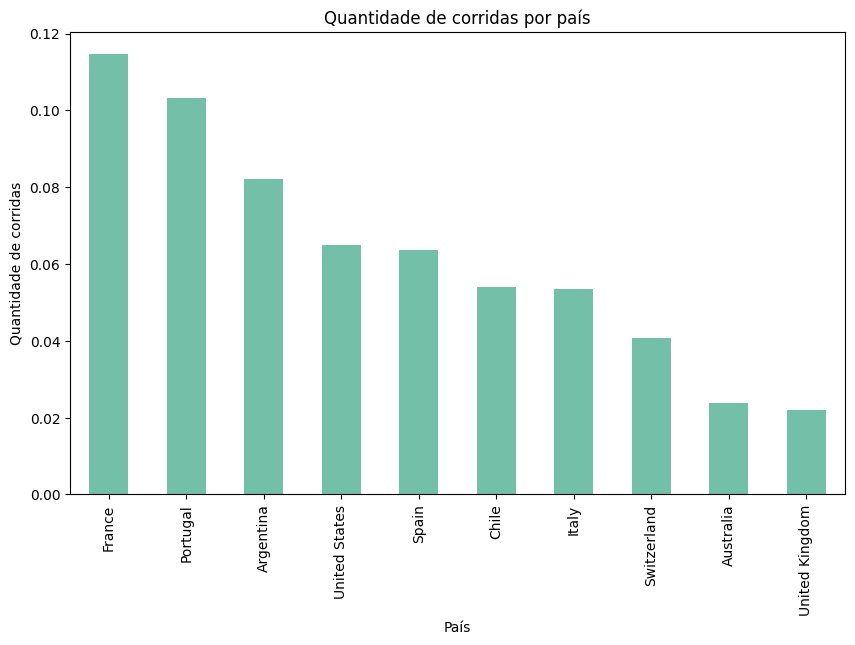

In [148]:
corridas_nao_br['City / Country'].value_counts(normalize=True).head(10).plot(kind='bar', color=azul_claro, xlabel='País', ylabel='Quantidade de corridas', title='Quantidade de corridas por país', figsize=(10, 6))
plt.show()